In [1]:
require(tidyverse)
require(data.table)
require(ggplot2)

require(chromVAR)
require(SummarizedExperiment)
require(RColorBrewer)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)
# #https://rpubs.com/Koundy/71792 theme_Publication
require(ComplexHeatmap)
cols.hm.avg.tf <- colorRampPalette(c(rgb(249, 249, 212, maxColorValue = 255), rgb(60, 
    181, 195, maxColorValue = 255), rgb(30, 35, 86, maxColorValue = 255)), space = "Lab")

require(ggpubr)
require(gghighlight)
require(pheatmap)

theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}
require(ggrepel)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.0     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”Warning message:
“package ‘dplyr’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: chromVAR

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: paral

Warning message:
“Removed 21 rows containing missing values (geom_text).”

Warning message:
“Removed 21 rows containing missing values (geom_text).”

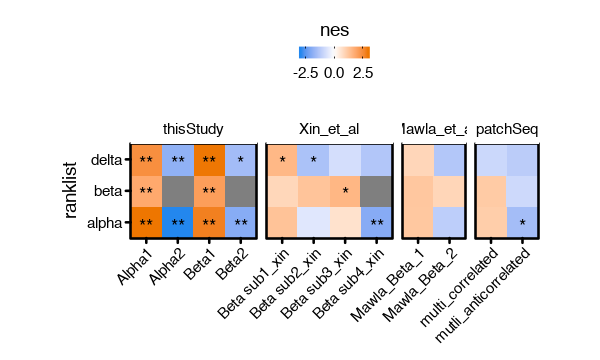

In [2]:
res.gsea <- do.call(rbind, lapply(c("alpha", "beta", "delta"), function(ct) fread(paste0("../figures/Fig2/subfigs/GSEA_", 
    ct, "_res_final.csv")) %>% mutate(ranklist = ct)))
# res.gsea %>% head(1) res.gsea %>% str res.gsea %>% pull(Term) %>% unique
res.gsea <- res.gsea %>% mutate(glist_set = ifelse(Term %in% paste0(rep(c("Alpha", 
    "Beta"), each = 2), 1:2), "thisStudy", ifelse(grepl("xin", Term), "Xin_et_al", 
    ifelse(grepl("Mawla", Term), "Mawla_et_al", "patchSeq")))) %>% mutate(significance = ifelse(fdr < 
    0.01, "**", ifelse(fdr < 0.1, "*", NA))) %>% mutate(glist_set = factor(glist_set, 
    levels = c("thisStudy", "Xin_et_al", "Mawla_et_al", "patchSeq")))
                                  options(repr.plot.width = 5, repr.plot.height = 3)
rg <- res.gsea$nes %>% range(na.rm = T)
rg.max <- max(abs(rg)) %>% round - 0.5
ggplot(res.gsea, aes(Term, ranklist)) + geom_tile(aes(fill = nes)) + geom_text(aes(label = significance), 
    hjust = 0.5, vjust = 0.75) + facet_grid(. ~ glist_set, scales = "free_x", space = "free") + 
    scale_fill_gradient2(low = "dodgerblue2", mid = "white", high = "darkorange2", 
        guide = guide_colourbar(ticks.colour = "black", title.position = "top", title.hjust = 0.5, 
            nbins = 10), breaks = c(-rg.max, 0, rg.max)) + theme_pubr() + theme(axis.title.x = element_blank(), 
    aspect.ratio = 1, legend.box.background = element_blank(), legend.box.margin = margin(0, 
        0, 0, 0), legend.key.width = unit("3", "mm"), legend.key.height = unit("2.5", 
        "mm"), legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1)) + 
    coord_cartesian(expand = F, clip = "off")
ggsave(filename = "../figures/Fig2/subfigs/fig_2B.prom_GSEA.pdf", width = 5, height = 3, 
    useDingbats = F)
system("open ../figures/Fig2/subfigs/fig_2B.prom_GSEA.pdf")
fwrite(res.gsea, "../figures/Fig2/subfigs/fig_2B.prom_GSEA.csv")
system("open ../figures/Fig2/subfigs/fig_2B.prom_GSEA.csv")